In [2]:
import threading
import time
import numpy as np
import pandas as pd

In [5]:
import multiprocessing
numberOfCores = multiprocessing.cpu_count()
print(f"the number of cores are {numberOfCores}")

the number of cores are 4


In [6]:
activethreads=threading.active_count()
print(f"threads when no processing={activethreads}")

threads when no processing=6


In [8]:
def row_mul(row,size,mata,matb,output):
    for col in range(size):
        sum=0
        for iterator in range(size):
            sum+=mata[row][iterator]*matb[iterator][col]
        output[row][col]=sum
    return

In [16]:
def multithreading(size,mata,matb,output,num_threads):
    starttime=time.time()
    for i in range(size):
        t = threading.Thread(target=row_mul , args=(i,size,mata,matb,output))
        t.start()
        while True:
            if (threading.active_count()-activethreads+1<=num_threads):
                break
            time.sleep(1)
    while True:
        if (threading.active_count()==activethreads):
            break
    # print(f"threads left {threading.active_count()-activethreads}")
    return(time.time()-starttime)

In [10]:
sizes=[50,100,150,250]
threads=[1,2,3,4,5,6]

    

In [13]:
df = pd.DataFrame(columns=threads)

In [17]:
for size in sizes:
    mata = np.random.randint(0, 10, size=(size, size))
    matb = np.random.randint(0, 10, size=(size, size))
    output=np.zeros((size, size))
    temp = [multithreading(size,mata,matb,output,thread) for thread in threads]
    df.loc[size] = temp
    

In [21]:
print(df)

              1          2          3          4          5          6
50    11.920769   3.000739   3.011734   3.410571   3.600901   3.505535
100   91.680194  10.179920   7.157341   7.039902   8.063436   6.990062
150  168.889519  21.512215  21.721915  29.008381  13.902384  16.210472
250  282.318916  85.923991  43.694029  28.566144  37.777856  52.000370


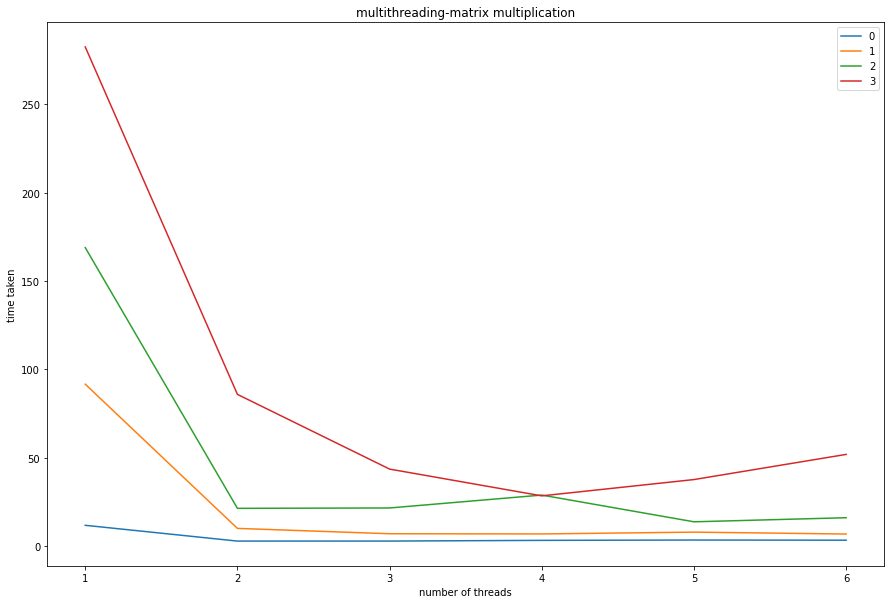

In [4]:
import matplotlib.pyplot as plt
import os
plt.figure(figsize=(15, 10))
for row in df.iterrows():
    label = row[0]
    values = row[1]
    plt.plot(df.columns, values, label=label)

# Add labels and title
plt.xlabel('number of threads')
plt.ylabel('time taken')
plt.title('multithreading-matrix multiplication')

# Add legend
plt.legend()
file_name = "graph.png"  # Specify the desired file name and extension
fig = plt.gcf()  # Get the current figure
fig.set_facecolor('white')
folder_name=""
file_path = os.path.join(folder_name, file_name)
plt.savefig(file_path)
# Display the plot
plt.show()

In [23]:
df.to_csv('time_taken.csv', index=False)

In [24]:
file_name = "graph.png"  
fig = plt.gcf()  
fig.set_facecolor('white')
plt.savefig(file_name)

<Figure size 432x288 with 0 Axes>

In [3]:
df=pd.read_csv("time_taken.csv")